In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kr_helper_funcs as kr
from sklearn.preprocessing import MinMaxScaler
import kr_helper_funcs as kr
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from lime import lime_tabular
import shap
import tensorflow_addons as tfa
import os
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Flowers Model

In [2]:
name = 'pets'
fileName = "{}-values-new.csv".format(name)


res = pd.read_csv(fileName, low_memory=False)

save_path = os.path.join('C:/Users/dan39/OneDrive/Desktop/DissertationLatex/DissertationLatex/images/', name)
                         
def save(img_name):
    plt.savefig(os.path.join(save_path, img_name))

In [3]:
pd.options.display.max_columns = None
res

,original_class,original_probability,new_probability,confidence_diff,class_change,new_class,explainer,strategy,sigma,time,num_features
0,Egyptian_cat,0.976787,0.983150,-0.006362,False,Egyptian_cat,shap,top,1,31.881510,1
1,Egyptian_cat,0.976787,0.000586,0.976201,True,window_screen,shap,rest,1,0.266289,1
2,Egyptian_cat,0.976787,0.953564,0.023224,False,Egyptian_cat,shap,top,1,0.299229,2
3,Egyptian_cat,0.976787,0.007605,0.969182,True,window_screen,shap,rest,1,0.298173,2
4,Egyptian_cat,0.976787,0.855041,0.121746,False,Egyptian_cat,shap,top,1,0.259180,3
...,...,...,...,...,...,...,...,...,...,...,...
15995,Persian_cat,0.946041,0.004085,0.941957,True,apron,random,rest,1,0.235340,18
15996,Persian_cat,0.946041,0.007149,0.938892,True,apron,random,top,1,0.274278,19
15997,Persian_cat,0.946041,0.001829,0.944213,True,apron,random,rest,1,0.253288,19
15998,Persian_cat,0.946041,0.011152,0.934889,True,apron,random,top,1,0.262301,20


In [4]:
res[(res['strategy'] == 'top') & (res['explainer'] == 'grad') & (res['num_features'] == 5)]

,original_class,original_probability,new_probability,confidence_diff,class_change,new_class,explainer,strategy,sigma,time,num_features
8008,Egyptian_cat,0.976787,0.484422,0.492366,False,Egyptian_cat,grad,top,1,0.245302,5
8048,Siamese_cat,0.960755,0.151227,0.809528,True,keeshond,grad,top,1,0.163860,5
8088,quilt,0.976007,0.946870,0.029137,False,quilt,grad,top,1,0.174543,5
8128,Siamese_cat,0.999820,0.787816,0.212004,False,Siamese_cat,grad,top,1,0.164561,5
8168,Persian_cat,0.913235,0.924293,-0.011058,False,Persian_cat,grad,top,1,0.172537,5
...,...,...,...,...,...,...,...,...,...,...,...
11808,Persian_cat,0.981123,0.275215,0.705908,True,keeshond,grad,top,1,0.217405,5
11848,Siamese_cat,0.990678,0.309431,0.681247,False,Siamese_cat,grad,top,1,0.220666,5
11888,Persian_cat,0.998547,0.910775,0.087772,False,Persian_cat,grad,top,1,0.223400,5
11928,Siamese_cat,0.996525,0.210851,0.785674,True,Persian_cat,grad,top,1,0.215664,5


## G1 Number of images from each flower class

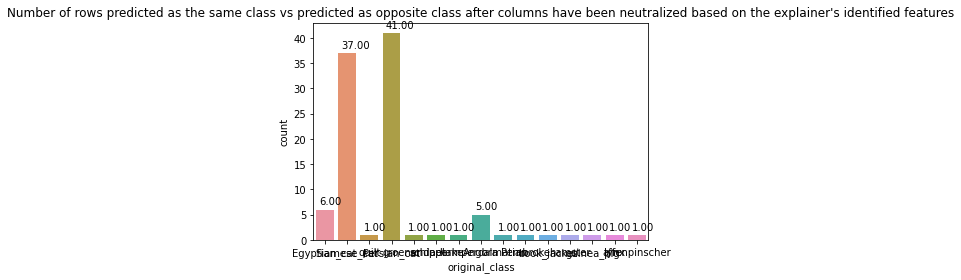

In [5]:
ax = sns.countplot(x="original_class",data=res[(res['strategy'] == 'top') & (res['explainer'] == 'shap') & (res['num_features'] == 5) & (res['sigma'] == 1)] ) 
# ax.set(xticklabels=['cats', 'dogs'])
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
# save("class distribution")

## G2 All class changes (per class) across all explainers that occured while using strategy top

Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

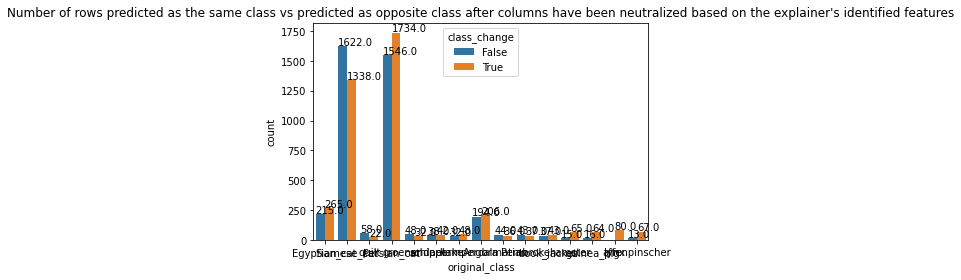

In [6]:
ax = sns.countplot(x="original_class",data=res[ (res['strategy'] == 'top')  ], hue = 'class_change')
# ax.set(xticklabels=['cats', 'dogs'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10))
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

In [7]:
# plt.figure(figsize=(10,4))
# ax = sns.barplot(x= "original_class", y= "class_change",  data=res[(res['strategy'] == 'top') ], estimator=lambda x: sum(x==False)*100.0/len(x))
# ax.set(xticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])

# index = 0
# for i in ax.patches:
#     total = res[(res['strategy'] == 'top')  &  (res['original_class'] == index)]["class_change"].count()
#     index = index + 1
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+0.0, i.get_height() +1, \
#             str(round((i.get_height()), 2))+'%', fontsize=14)

0


divide by zero encountered in longlong_scalars


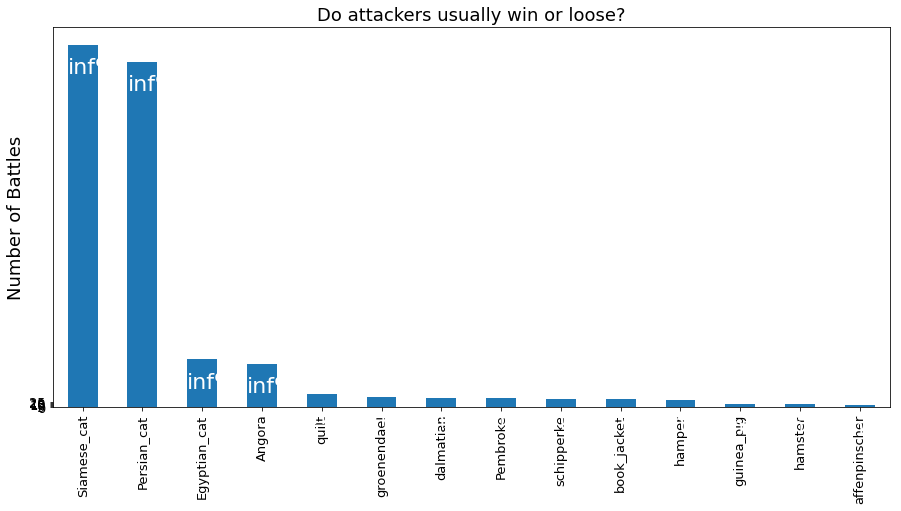

In [8]:
ax = res[(res['strategy'] == 'top') & (res["class_change"] == False) ]['original_class'].value_counts().plot(kind='bar', figsize=(15,7),
                                                   fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Do attackers usually win or loose?", fontsize=18)
ax.set_ylabel("Number of Battles", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20, 25])

# create a list to collect the plt.patches data
total = res[(res['strategy'] == 'top') & (res['explainer'] == 'random') &  (res['original_class'] == 1)]["class_change"].count()
print(total)
# find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_height())

# set individual bar lables using above list
# total = sum(totals)

# set individual bar lables using above list
index = 0
for i in ax.patches:
    total = res[(res['strategy'] == 'top')  &  (res['original_class'] == index)]["class_change"].count()
    index = index + 1
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.0, i.get_height()-130, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

In [9]:
res[(res['strategy'] == 'top') & (res['explainer'] == 'grad') &  (res['original_class'] == 3)].groupby("num_features").sum()

,original_probability,new_probability,confidence_diff,class_change,sigma,time
num_features,,,,,,


## G3 All class changes (per explainer) across both classes that occured while using strategy rest

Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

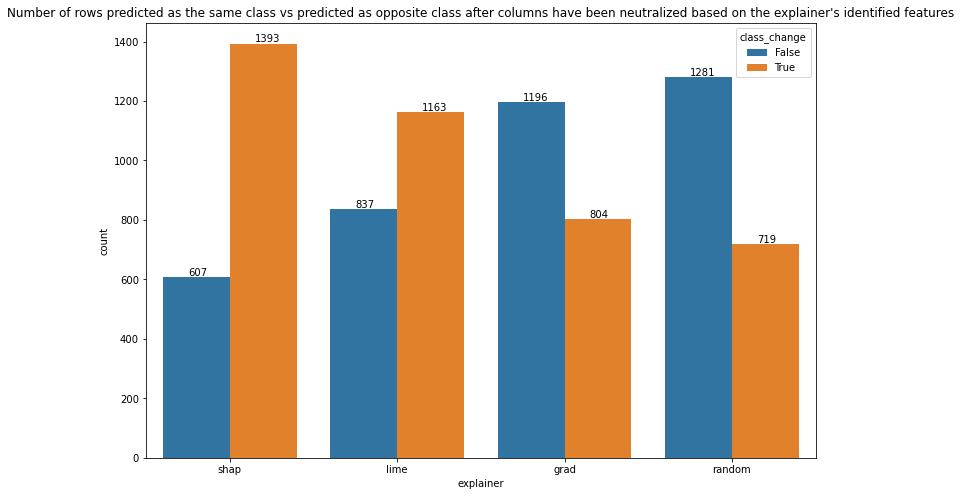

In [10]:
plt.figure(figsize=(12,8))
ax =sns.countplot(x="explainer",data=res[(res['strategy'] == 'top') ], hue = 'class_change')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

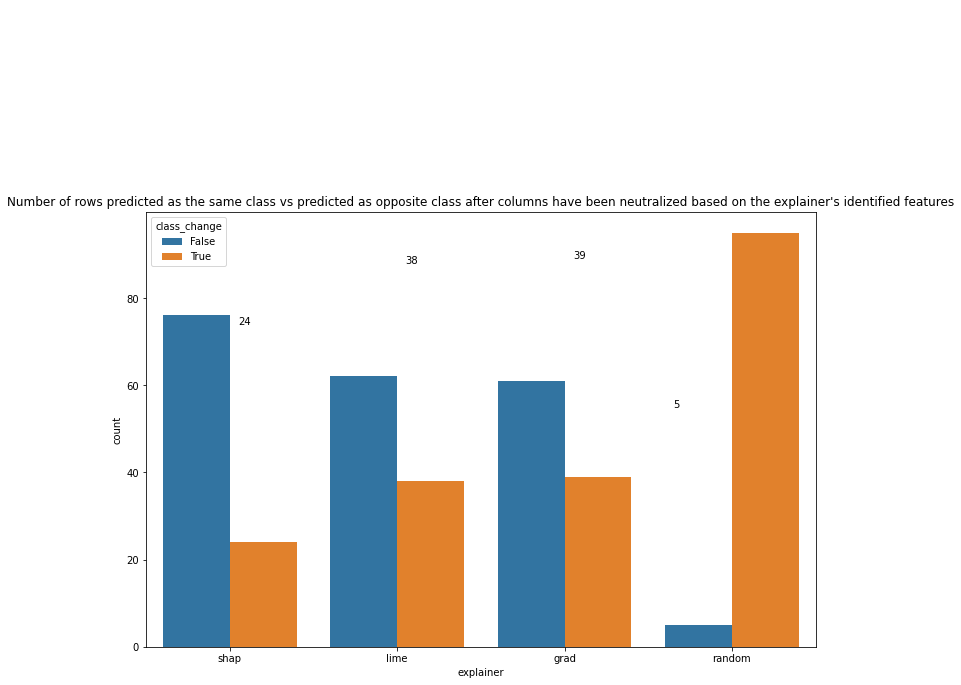

In [11]:
plt.figure(figsize=(12,8))
ax =sns.countplot(x="explainer",data=res[(res['strategy'] == 'rest') & (res['num_features'] == 20) ], hue = 'class_change')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

In [12]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
def t_test(data1, data2):
    # seed the random number generator
    seed(1)
    # generate two independent samples
#     data1 = 5 * randn(100) + 50
#     data2 = 5 * randn(100) + 51
    # compare samples
    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

def calculate_p(explainer1, explainer2, strategy, original_class, feature_number):
    data1 = res[ (res['strategy'] == strategy) & (res['explainer'] == explainer1) & (res['num_features'] == feature_number) & (res['original_class'] == original_class)]["confidence_diff"]
    data2 = res[ (res['strategy'] == strategy) & (res['explainer'] == explainer2) & (res['num_features'] == feature_number) & (res['original_class'] == original_class)]["confidence_diff"]
    print("Data1 mean {} Data2 mean {}".format(data1.mean(), data2.mean()))
    t_test(data1, data2)
    
calculate_p("random","shap", "top", original_class= 0, feature_number=20)

Data1 mean nan Data2 mean nan
Statistics=0.000, p=0.000
Different distribution (reject H0)


divide by zero encountered in double_scalars


divide by zero encountered in double_scalars


Statistics=0.000, p=0.000
Different distribution (reject H0)


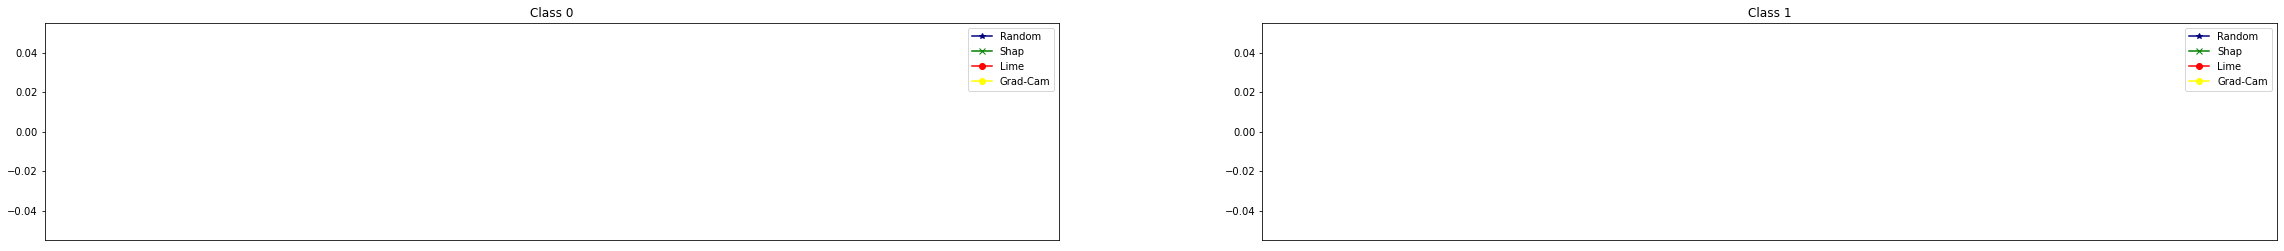

<Figure size 792x288 with 0 Axes>

<Figure size 792x288 with 0 Axes>

In [13]:
# Same as the graph above but the plot is class specific, in this case for class 1. For class 0, there are not enough datapoints to plot the graph
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 4))

def get_data(explainer, original_class):
    default_data = res[ (res['strategy'] == 'rest') & (res['sigma'] == 1)]
    if original_class == -1:
        return  default_data[(default_data['explainer'] == explainer) ].groupby("num_features")["confidence_diff"].mean()
    return default_data[(default_data['explainer'] == explainer) & (default_data['original_class'] == original_class)].groupby("num_features")["confidence_diff"].mean()


def get_plot(col, original_class):
    plt.figure(figsize=(11,4))
    no_of_features = list(range(0, len(get_data("grad", original_class)) ))
    ax[col].xaxis.set_ticks(get_data("shap", original_class).keys())
    # ax[0].set_xlim(1, 12)
    ax[col].plot( no_of_features, get_data("random", original_class), color='navy', marker='*', linestyle='-', label='Random')
    ax[col].plot( no_of_features, get_data("shap", original_class), color='green', marker='x', linestyle='-', label='Shap')
    ax[col].plot( no_of_features, get_data("lime", original_class), color='red', marker='o', linestyle='-', label='Lime')
    ax[col].plot( no_of_features, get_data("grad", original_class), color='yellow', marker='o', linestyle='-', label='Grad-Cam')
    ax[col].set_title("Class {}".format(original_class))
    ax[col].legend(loc='best')
    # ax[0].set(xticklabels=list(range(11)))
    return ax

get_plot(0, 0)
get_plot(1, 1)




data_shap = list(get_data("grad", 2).values)
# data_shap.extend(list(get_data("grad", 2).values))

data_lime = list(get_data("random", 2).values)
# data_lime.extend(list(get_data("random", 2).values))
t_test(data_shap, data_lime)

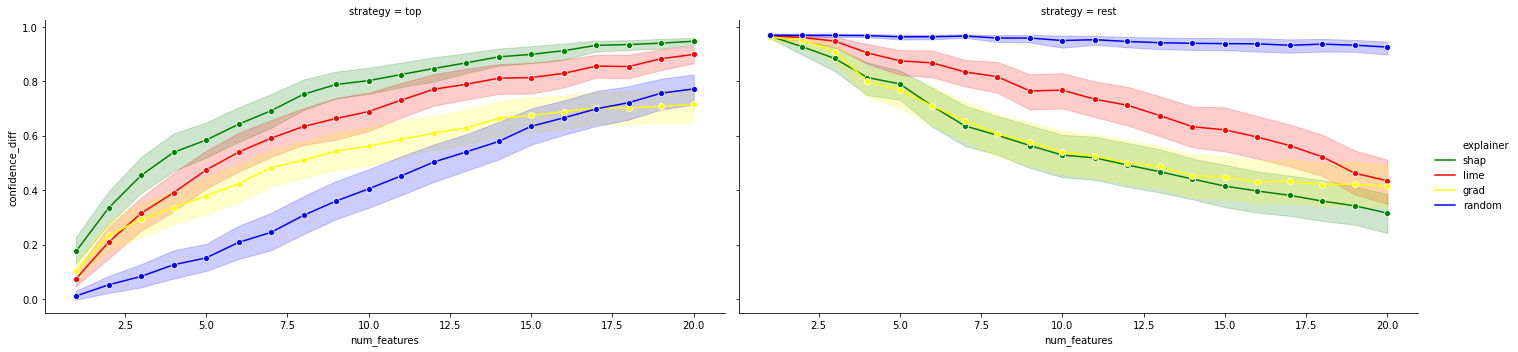

In [14]:
data = res[ (res['num_features'] <25)]

# f, ax = plt.figure(figsize=(11,4))
# sns.set_style("ticks")
palette = {"shap":"green", "lime":"red", "grad":"yellow", "random":"blue"}
g = sns.relplot(x='num_features', y="confidence_diff", hue ='explainer', marker="o", kind="line", col="strategy", dashes=False, markers=True, data = data, height=5, aspect=2, palette = palette);
# g.xaxis.set_ticks([str(x) for x in list(range(0,20))])
labels = [str(x) for x in list(range(0,20))]
# g.set(xticklabels=[str(x) for x in list(range(0,20))])
# g.set_xticklabels(labels)
# plt.tight_layout()


# data['original_class'] = data['original_class'].apply(lambda x: ["cats", "dogs"][int(x)] )
# sns.relplot(x='num_features', y="confidence_diff", hue ='explainer',  col="original_class", marker="o", kind="line", dashes=False, markers=True, data = data , palette = palette);

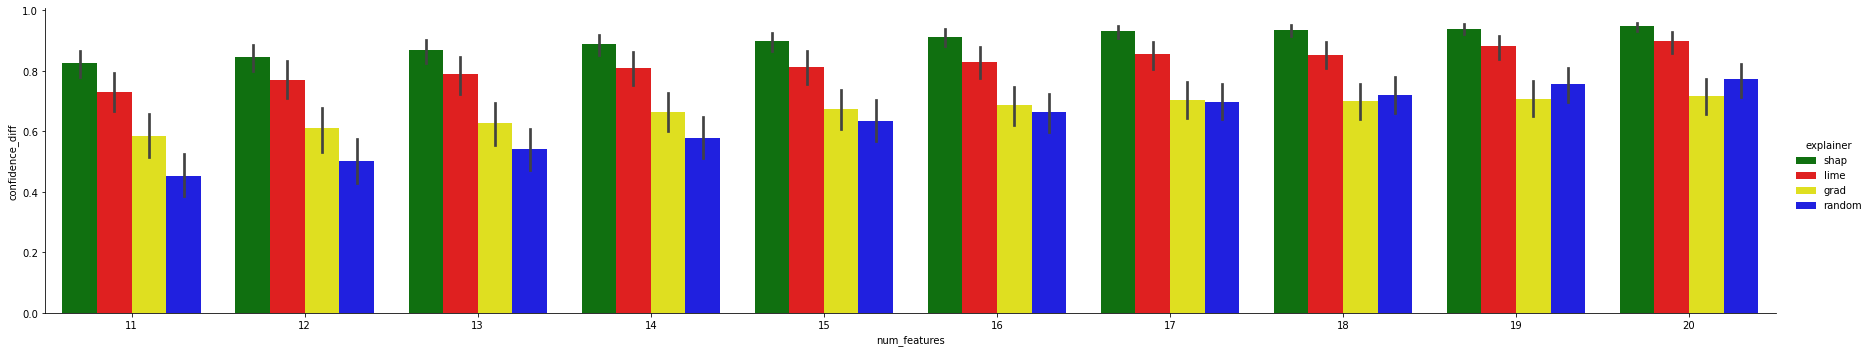

In [15]:
data = res[ (res['strategy'] == 'top') & (res['num_features'] > 10)]
sns.catplot(x="num_features", y="confidence_diff", hue="explainer", kind="bar", data=data, height=5, aspect=5,  palette = palette);

In [16]:
data['original_class'].apply(lambda x: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'][x])

TypeError: list indices must be integers or slices, not str

In [ ]:
default_data = res[ (res['strategy'] == 'top')]
default_data[(default_data['explainer'] == "grad") & (default_data['original_class'] == 1)]

In [ ]:
res[]